#### Simulations used a tau of 4, max pop size fold change of 3, 2e4 time steps

In [10]:
library(naturalsort)
library(fields)
library(rasterImage)
library(pracma) # only needed for moving-average plot
library(viridis)
cols1 = viridis(5)
cols2 = viridis(100)

muv <- c(0.05,0.10,0.50,1.00,5.00)
N0v <- c(1e2,5e2)
sdv <- c(0.001,0.010,0.100,1.000)
spv <- c(0.001,0.010,0.100,1.000)

dataDir <- '~/jackgl/colon_0906_1hit/'

For each N0 (initial population size, 4)  
&nbsp;&nbsp; For each mu (insertion rate, 5)  
&nbsp;&nbsp;&nbsp;&nbsp; For each Sd (driver selection strength, 4)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For each Sp (passenger selection strength, 4)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Repeated 5 times (5)  

N0 in (1e2,5e2,1e3,2e3)  
mu in (0.05,0.10,0.50,1.00,5.00)  
sd in (0.001,0.010,0.100,1.000)  
sp in (0.001,0.010,0.100,1.000)  

## Population size time series

In [2]:
flst <- naturalsort(list.files(dataDir))

In [3]:
Ns <- array(NA,dim=c(2,5,4,4,5,2e4))
# filenames <- array(NA,dim=c(4,5,4,4,5))

nn <- 1
for (ii in 1:2) {
    for (jj in 1:5) {
        for (kk in 1:4) {
            for (ll in 1:4) {
                for (mm in 1:5) {
                    load(paste0(dataDir,flst[nn]))
                    N[N==0] <- NA
                    Ns[ii,jj,kk,ll,mm,] <- N
#                     filenames[ii,jj,kk,ll,mm] <- flst[nn]
                    nn <- nn+1
                }
            }
        }
    }
}

In [4]:
Ns_repmean <- apply(Ns,c(1,2,3,4,6),mean)
Ns_repmed <- apply(Ns,c(1,2,3,4,6),median)
Ns_repstd <- apply(Ns,c(1,2,3,4,6),std)

In [7]:
nd <- array(NA,dim=c(2,5,4,4,5))
np <- array(NA,dim=c(2,5,4,4,5))

nn <- 1
for (ii in 1:2) {
    for (jj in 1:5) {
        for (kk in 1:4) {
            for (ll in 1:4) {
                for (mm in 1:5) {
                    load(paste0(dataDir,flst[nn]))
                    nd[ii,jj,kk,ll,mm] <- Pop$nd[1]
                    np[ii,jj,kk,ll,mm] <- Pop$np[1]
                    nn <- nn+1
                }
            }
        }
    }
}

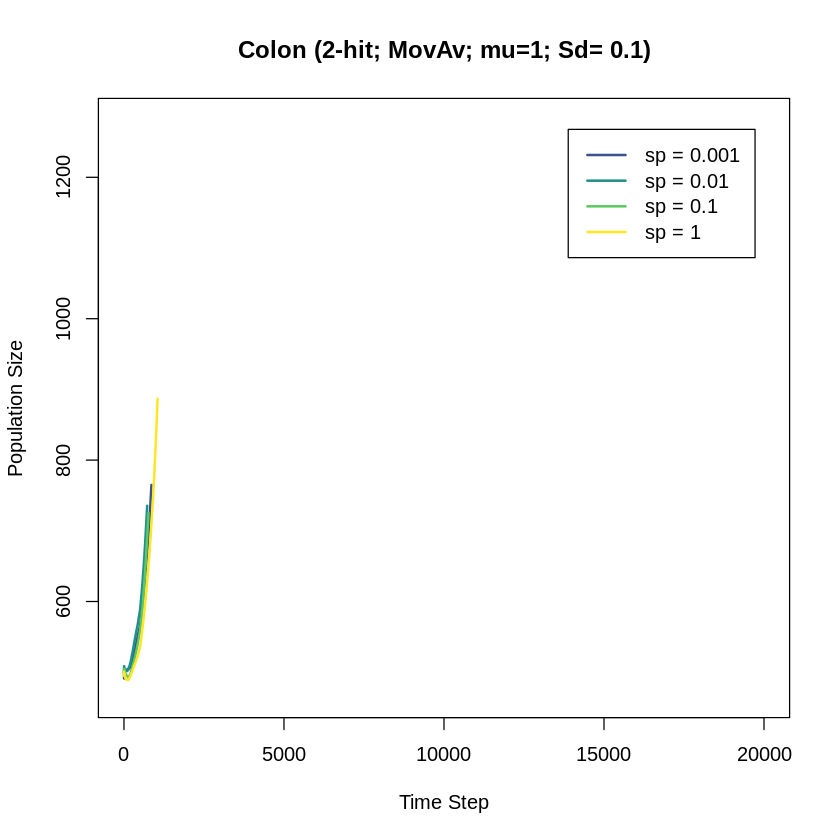

In [8]:
N0 <- 500
mu <- 1
sd <- .1

tmp <- Ns_repmean[which(N0v==N0),which(muv==mu),which(sdv==sd),1:4,]
plot(1:length(tmp[1,]),movavg(tmp[1,],500,'s'),type='l',main=paste0('Colon (2-hit; MovAv; mu=',toString(mu),';',' Sd= ',toString(sd),')'),xlab='Time Step',ylab='Population Size',ylim=c(min(tmp[!is.na(tmp)]),max(tmp[!is.na(tmp)])),col=cols1[2],lwd=2)
for (i in 2:4) {lines(1:length(tmp[i,]),movavg(tmp[i,],500,'s'),type='l',xlab='Time Step',ylab='Population Size',col=cols1[i+1],lwd=2)}
legend('topright',legend=c("sp = 0.001","sp = 0.01","sp = 0.1","sp = 1"),lty=1,lwd=2,col=tail(cols1,n=4),inset=0.05)
options(repr.plot.width=7, repr.plot.height=7)

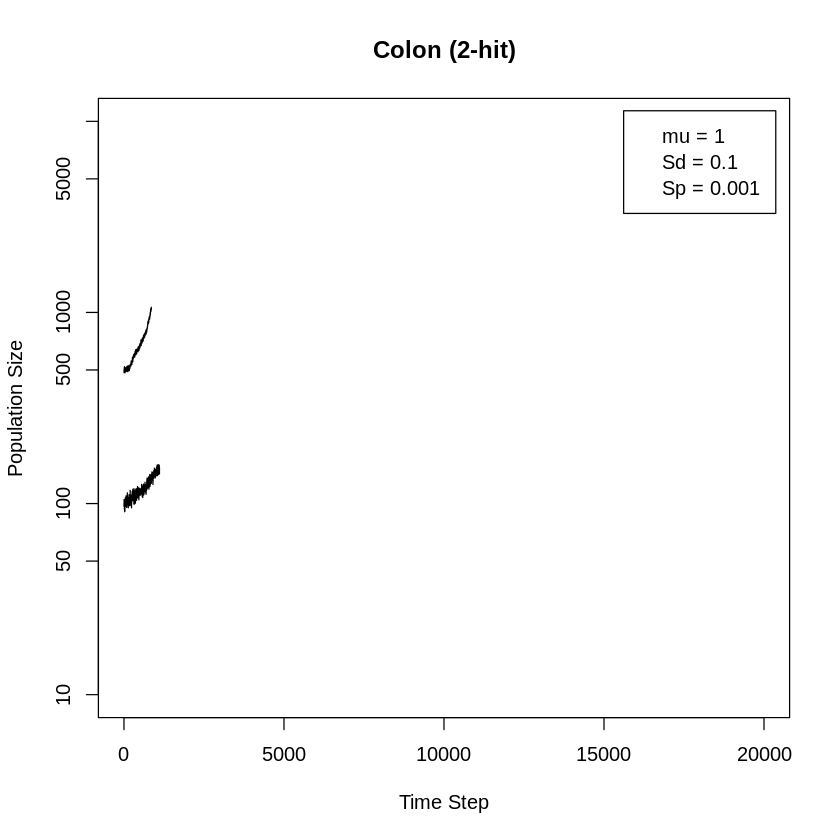

In [11]:
mu <- 1
sd <- .1
sp <- .001
tmp <- Ns_repmean[,which(muv==mu),which(sdv==sd),which(spv==sp),]
plot(1:length(tmp[1,]),tmp[1,],type='l',main='Colon (2-hit)',xlab='Time Step',ylab='Population Size',ylim=c(10,1e4),log='y')
for (i in 2) {lines(1:length(tmp[i,]),tmp[i,],type='l',xlab='Time Step',ylab='Population Size')}
legend('topright',legend=c(paste0("mu = ",toString(mu)),
                          paste0("Sd = ",toString(sd)),
                          paste0("Sp = ",toString(sp))),lty=0,inset=0.02)

## Heat maps

In [12]:
Ns_fc <- array(NA,dim=c(2,5,4,4,5))
for (ii in 1:2) {
    for (jj in 1:5) {
        for (kk in 1:4) {
            for (ll in 1:4) {
                for (mm in 1:5) {
                    tmpN <- Ns[ii,jj,kk,ll,mm,]
                    Ns_fc[ii,jj,kk,ll,mm] <- tmpN[length(which(!is.na(tmpN)))]/tmpN[1]
                }
            }
        }
    }
}
rm(tmpN)
Ns_fc_mean <- apply(Ns_fc,c(1,2,3,4),mean)
Ns_fc_med <- apply(Ns_fc,c(1,2,3,4),median)
Ns_fc_std <- apply(Ns_fc,c(1,2,3,4),std)

dim(Ns_fc)

[1] 2 5 4 4 5

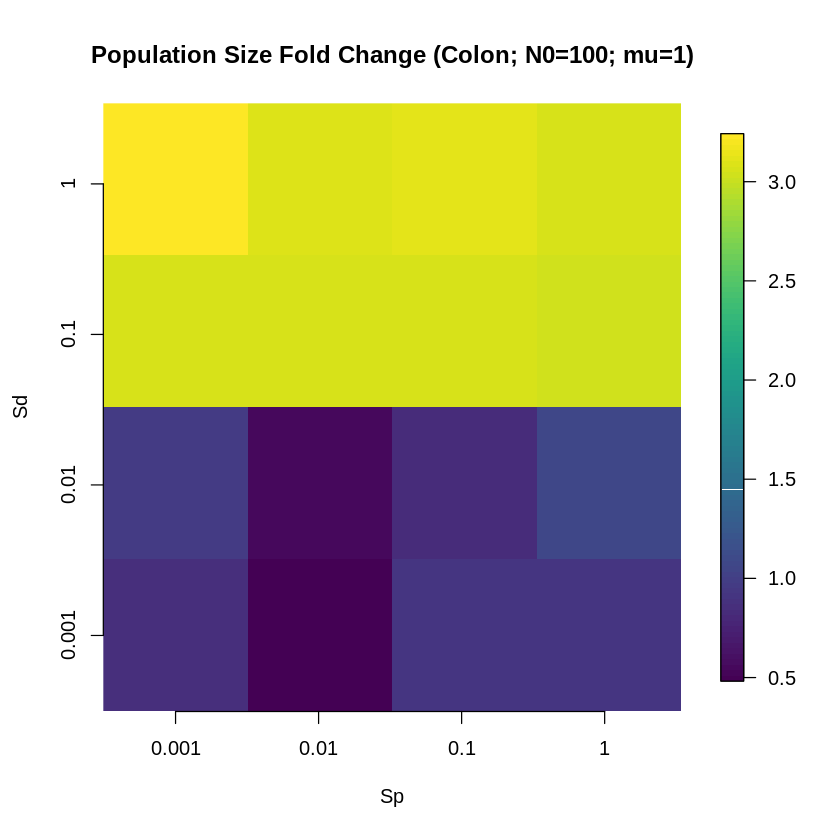

In [36]:
mu <- 1
N0 <- 100
image.plot(t(Ns_fc_mean[which(N0v==N0),which(muv==mu),,]),axes=F,col=cols2)
title(main=paste0('Population Size Fold Change (Colon; N0=',toString(N0),'; mu=',toString(mu),')'),xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.33), labels=c(1e-3,1e-2,1e-1,1e-0)); 
axis(2, at=seq(0,1,0.33), labels=c(1e-3,1e-2,1e-1,1e-0)); 

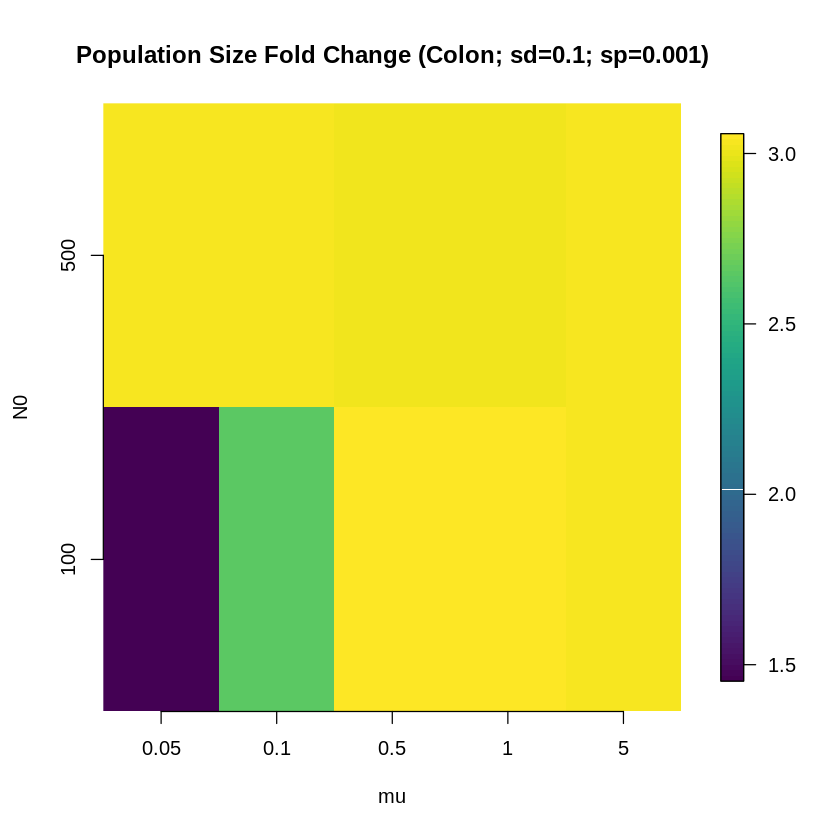

In [18]:
sd <- .1
sp <- .001
image.plot(t(Ns_fc_mean[,,which(sdv==sd),which(spv==sp)]),axes=F,col=cols2)
title(main=paste0('Population Size Fold Change (Colon; sd=',toString(sd),'; sp=',toString(sp),')'),xlab='mu',ylab='N0');
axis(1, at=seq(0,1,0.25), labels=muv); 
axis(2, at=seq(0,1,1), labels=N0v); 

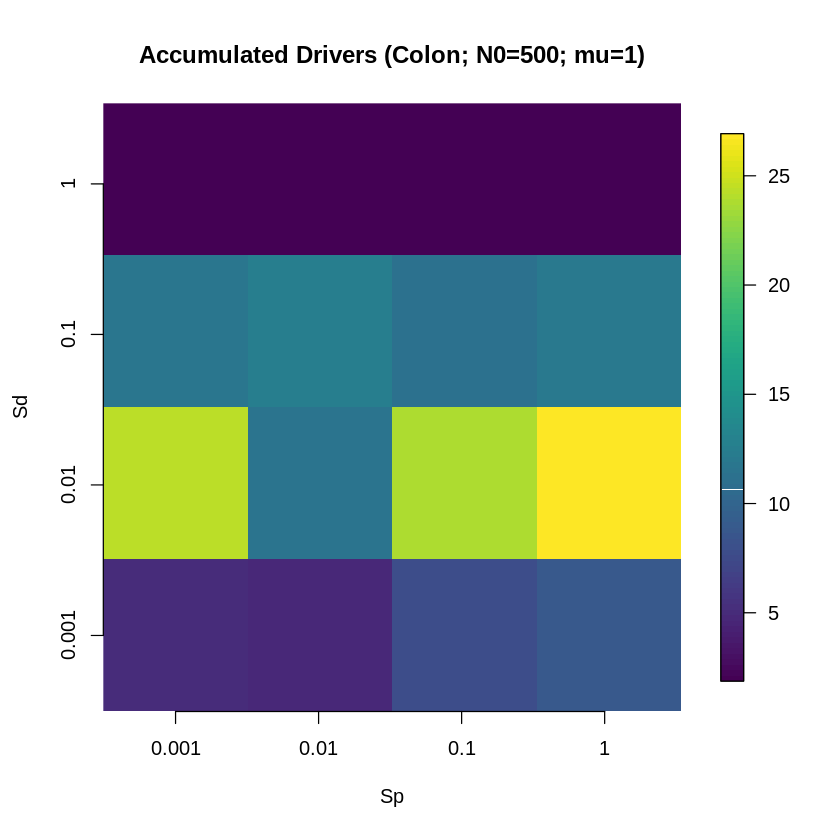

In [38]:
mu <- 1
N0 <- 500
tmp <- apply(nd,c(1,2,3,4),mean)
image.plot(t(tmp[which(N0v==N0),which(muv==mu),,]),axes=F,col=cols2)
title(main=paste0('Accumulated Drivers (Colon; N0=',toString(N0),'; mu=',toString(mu),')'),xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.33), labels=c(1e-3,1e-2,1e-1,1e-0)); 
axis(2, at=seq(0,1,0.33), labels=c(1e-3,1e-2,1e-1,1e-0)); 

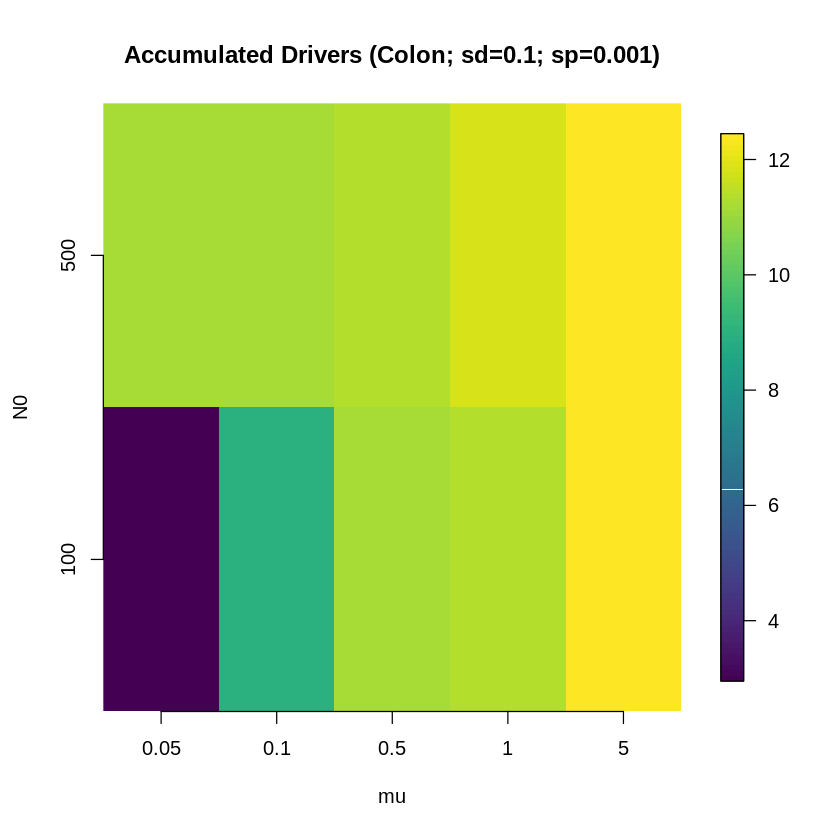

In [34]:
sd <- .1
sp <- .001
tmp <- apply(nd,c(1,2,3,4),mean)
image.plot(t(tmp[,,which(sdv==sd),which(spv==sp)]),axes=F,col=cols2)
title(main=paste0('Accumulated Drivers (Colon; sd=',toString(sd),'; sp=',toString(sp),')'),xlab='mu',ylab='N0');
axis(1, at=seq(0,1,0.25), labels=muv); 
axis(2, at=seq(0,1,1), labels=N0v); 

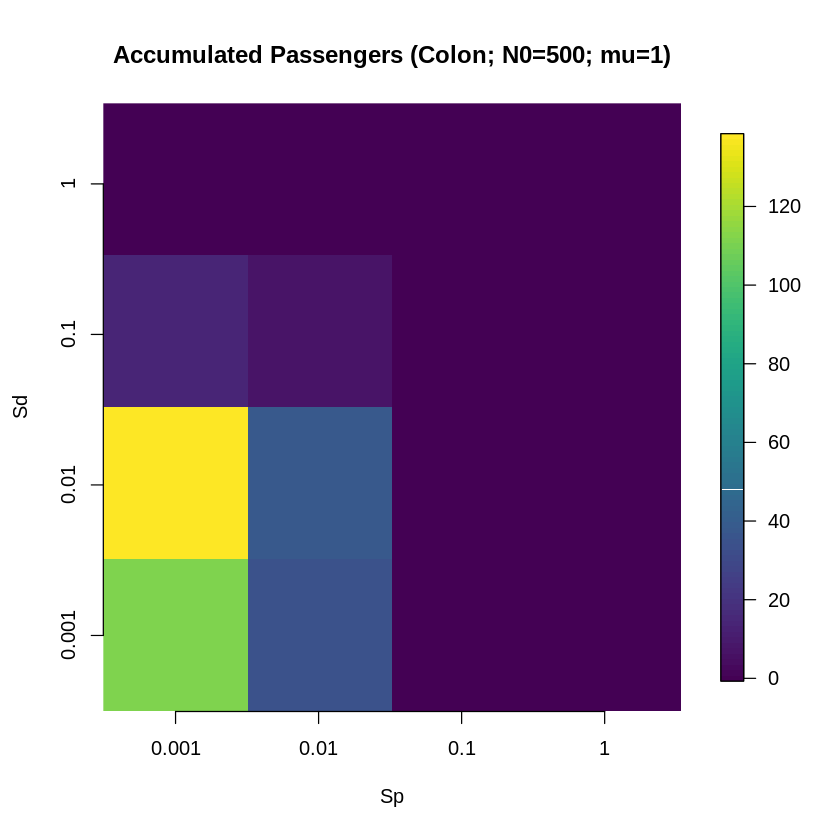

In [37]:
mu <- 1
N0 <- 500
tmp <- apply(np,c(1,2,3,4),mean)
image.plot(t(tmp[which(N0v==N0),which(muv==mu),,]),axes=F,col=cols2)
title(main=paste0('Accumulated Passengers (Colon; N0=',toString(N0),'; mu=',toString(mu),')'),xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.33), labels=c(1e-3,1e-2,1e-1,1e-0)); 
axis(2, at=seq(0,1,0.33), labels=c(1e-3,1e-2,1e-1,1e-0)); 

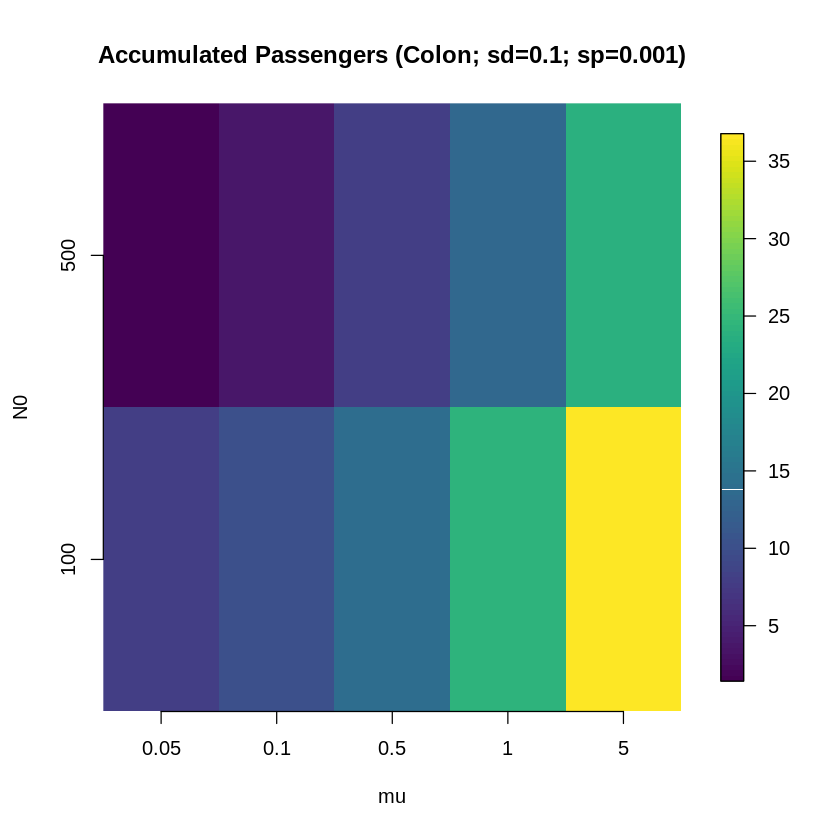

In [33]:
sd <- .1
sp <- .001
tmp <- apply(np,c(1,2,3,4),mean)
image.plot(t(tmp[,,which(sdv==sd),which(spv==sp)]),axes=F,col=cols2)
title(main=paste0('Accumulated Passengers (Colon; sd=',toString(sd),'; sp=',toString(sp),')'),xlab='mu',ylab='N0');
axis(1, at=seq(0,1,0.25), labels=muv); 
axis(2, at=seq(0,1,1), labels=N0v); 